# Handcrafted Features & Logistic Regression / Random Forest / Dummy classifiers


In [1]:
import numpy as np
import pandas as pd
import re
import statistics
from collections import Counter

import emoji
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/matjazibb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/matjazibb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv("data/non-processed/dataset12/MMHS150K.csv", keep_default_na=False)
data["tweet"] += " " + data["tweet_img_text"]
del data["tweet_img_text"]

In [4]:
data.head(30)

,id,tweet,label
0,1114679353714016256,@FriskDontMiss Nigga https://t.co/cAsaLWEpue #...,OFF
1,1063020048816660480,My horses are retarded https://t.co/HYhqc6d5WN,OFF
2,1108927368075374593,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,NOT
3,1114558534635618305,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,NOT
4,1035252480215592966,“EVERYbody calling you Nigger now!” https://t....,OFF
5,1106978219654303744,“ real ass bitch give a fuck boutta nigga” htt...,NOT
6,1113920043568463874,@WhiteHouse @realDonaldTrump Fuck ice. White s...,OFF
7,1114588617693966336,Day’s a cunt https://t.co/Ie6QZReHsw Dad's a C...,NOT
8,1045809514740666370,#sissy faggot https://t.co/bm1nk8HcYO EVERY SI...,OFF
9,1108178453910695936,@Gloriko_ Nigga what? https://t.co/nOwIJtgtU1,OFF


In [5]:
tweet_tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
lemmatizer = WordNetLemmatizer()
en_stopwords = set(stopwords.words("english"))

def tokenize_tweet(tweet):
    tweet = " ".join(tweet_tokenizer.tokenize(tweet))
    tweet = emoji.demojize(tweet)
    tweet = re.sub(r'@[A-Za-z0–9_]+', 'USER', tweet)
    # tweet = re.sub(r'#[A-Za-z0–9_]+', 'HASHTAG', tweet)
    tweet = re.sub(r'\d', '#', tweet)
    tweet = re.sub(r'https?:\/\/\S+', 'URL', tweet)
    tweet = re.sub(r'[\.\,\;\:\!\?]+', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.lower()

    return [lemmatizer.lemmatize(token) for token in tweet.split(" ") if token not in en_stopwords and len(token) > 1]

data['tokens'] = data['tweet'].apply(tokenize_tweet)

In [6]:
data.head(30)

,id,tweet,label,tokens
0,1114679353714016256,@FriskDontMiss Nigga https://t.co/cAsaLWEpue #...,OFF,"[nigga, url, #youngeru, save]"
1,1063020048816660480,My horses are retarded https://t.co/HYhqc6d5WN,OFF,"[horse, retarded, url]"
2,1108927368075374593,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,NOT,"[nigga, momma, youngboy, spitting, real, shit,..."
3,1114558534635618305,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,NOT,"[rt, xxsugvngxx, ran, holy, nigga, today, loud..."
4,1035252480215592966,“EVERYbody calling you Nigger now!” https://t....,OFF,"[everybody, calling, nigger, url]"
5,1106978219654303744,“ real ass bitch give a fuck boutta nigga” htt...,NOT,"[real, as, bitch, give, fuck, boutta, nigga, url]"
6,1113920043568463874,@WhiteHouse @realDonaldTrump Fuck ice. White s...,OFF,"[fuck, ice, white, supremacist, trash, racist,..."
7,1114588617693966336,Day’s a cunt https://t.co/Ie6QZReHsw Dad's a C...,NOT,"[day, cunt, url, dad's, cunt, mum's, cunt, nan..."
8,1045809514740666370,#sissy faggot https://t.co/bm1nk8HcYO EVERY SI...,OFF,"[#sissy, faggot, url, every, sissy, girl, know..."
9,1108178453910695936,@Gloriko_ Nigga what? https://t.co/nOwIJtgtU1,OFF,"[nigga, url]"


In [7]:
train, test = train_test_split(data, test_size=0.1)

In [8]:
off_data = train.loc[train.label == "OFF"]
not_data = train.loc[train.label == "NOT"]

In [9]:
def get_tf(data):
    tf = Counter()
    for i, row in data.iterrows():
        tf.update(row["tokens"])
    return tf

def get_wtf(class_tf, corpus_tf):
    wtf = dict()
    for token, freq in class_tf.items():
        wtf[token] = freq/corpus_tf[token]
    return wtf

def plot_word_count(tf, **kwargs):
    wc = WordCloud(**kwargs).generate_from_frequencies(tf)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout()

In [10]:
off_tf = get_tf(off_data)
not_tf = get_tf(not_data)
tf = get_tf(train)

In [11]:
off_wtf = get_wtf(off_tf, tf)
not_wtf = get_wtf(not_tf, tf)

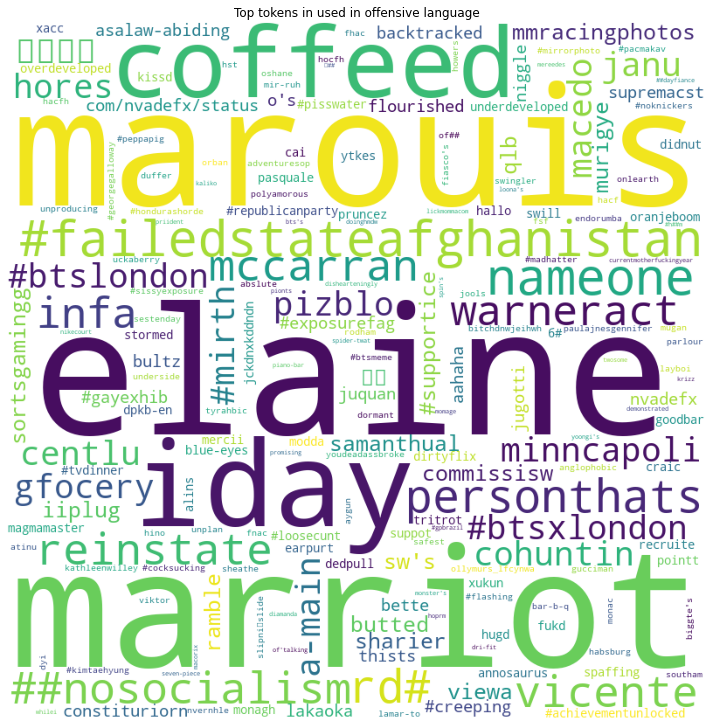

In [12]:
plt.figure(figsize=(10,10))
plot_word_count(off_wtf, width=800, height=800, background_color="white")
plt.title("Top tokens in used in offensive language")
plt.savefig("results/eval-handcrafted-wordcloud-off.pdf")

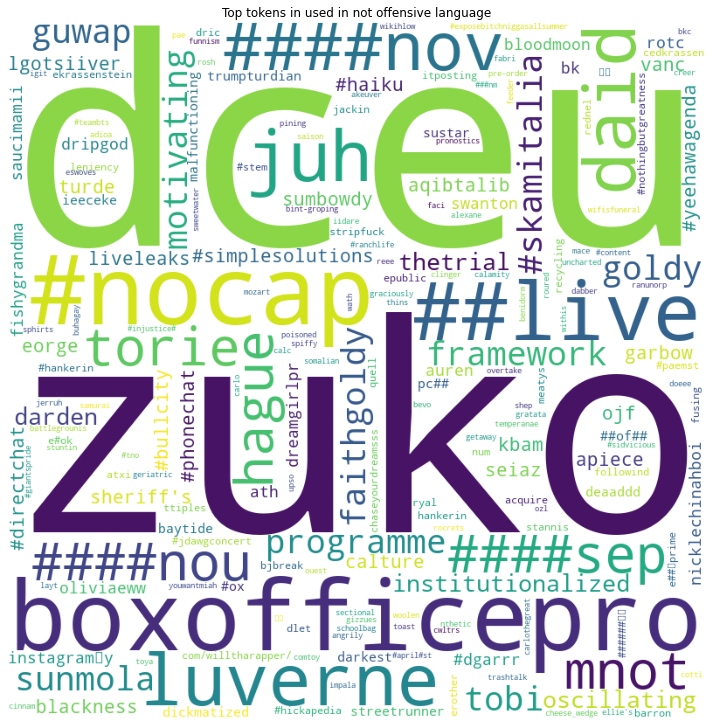

In [13]:
plt.figure(figsize=(10,10))
plot_word_count(not_wtf, width=800, height=800, background_color="white")
plt.title("Top tokens in used in not offensive language")
plt.savefig("results/eval-handcrafted-wordcloud-not.pdf")

In [14]:
def plot_token_importances(top=20):
    labels = [token for token, freq in sorted(tf.items(), key=lambda x: x[1], reverse=True)[:top]]
    off_importances = [off_tf.get(token, 0)/freq for token, freq in sorted(tf.items(), key=lambda x: x[1], reverse=True)[:top]]
    not_importances = list(map(lambda x: 1 - x, off_importances))
    plt.bar(labels, not_importances, label="NOT")
    plt.bar(labels, off_importances, bottom=not_importances, label="OFF")

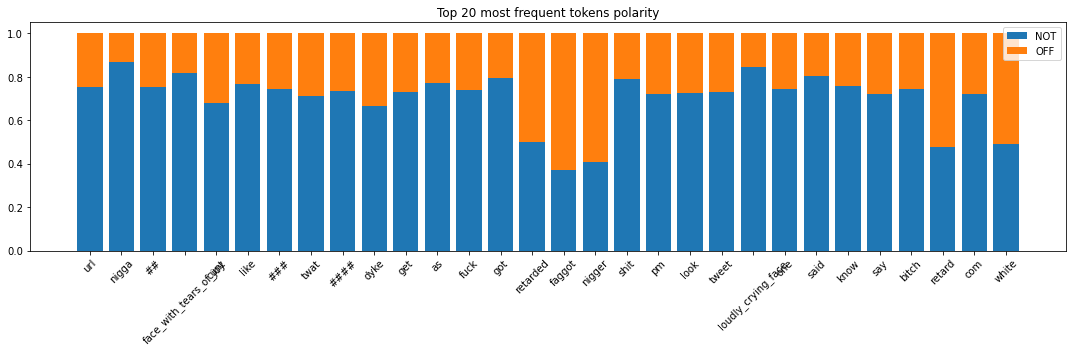

In [15]:
plt.figure(figsize=(15, 5))
plot_token_importances(top=30)
plt.legend()
plt.xticks(rotation=45)
plt.title("Top 20 most frequent tokens polarity")
plt.tight_layout()
plt.savefig("results/eval-handcrafted-top-tokens.pdf")

In [16]:
def feature_vector(tokens):
    n = len(tokens)
    nots = [not_wtf.get(token, 0) for token in tokens]
    offs = [off_wtf.get(token, 0) for token in tokens]
    p_not = sum([1 if not_wtf > off_wtf else 0 for not_wtf, off_wtf in zip(nots, offs)]) / n
    return [
        p_not,
        min(nots), min(offs),
        max(nots), max(offs),
        statistics.mean(nots), statistics.mean(offs),
        statistics.median(nots), statistics.median(offs),
        statistics.stdev(nots), statistics.stdev(offs),
    ]

In [17]:
train["feature_vector"] = train["tokens"].apply(feature_vector)
test["feature_vector"] = test["tokens"].apply(feature_vector)

/home/matjazibb/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/matjazibb/miniconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
train_X, train_y = np.stack(train.feature_vector), train.label.to_numpy()
test_X, test_y = np.stack(test.feature_vector), test.label.to_numpy()

In [19]:
logistic_regression = LogisticRegression(class_weight="balanced", max_iter=1000)
logistic_regression.fit(train_X, train_y)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [20]:
random_forest = RandomForestClassifier(class_weight="balanced")
random_forest.fit(train_X, train_y)

RandomForestClassifier(class_weight='balanced')

In [21]:
dummy = DummyClassifier()
dummy.fit(train_X, train_y)

DummyClassifier()

In [22]:
def eval_model(model, X, y_true):
    y_hat = model.predict(X)
    p_hat = model.predict_proba(X)

    assert model.classes_[1] == "OFF"
    p_hat = p_hat[:,1]
    
    f1 = sklearn.metrics.f1_score(y_true, y_hat, pos_label="OFF")
    precision = sklearn.metrics.precision_score(y_true, y_hat, pos_label="OFF")
    recall = sklearn.metrics.recall_score(y_true, y_hat, pos_label="OFF")
    fpr, tpr, t = sklearn.metrics.roc_curve(y_true, p_hat, pos_label="OFF")
    roc_auc = sklearn.metrics.auc(fpr, tpr)

    return f1, precision, recall, roc_auc, fpr, tpr

In [23]:
eval_models = [
    ("LogReg-MMHS150K-en",          logistic_regression,    test_X,              test_y),
    ("RanFor-MMHS150K-en",          random_forest,          test_X,              test_y),
    ("Dummy-MMHS150K-en",           dummy,                  test_X,              test_y),
]

results = []

for model_name, model, X, y_true in eval_models:
    f1, precision, recall, roc_auc, fpr, tpr = eval_model(model, X, y_true)
    results += [(model_name, f1, precision, recall, roc_auc, fpr, tpr)]

/home/matjazibb/miniconda3/envs/nlp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


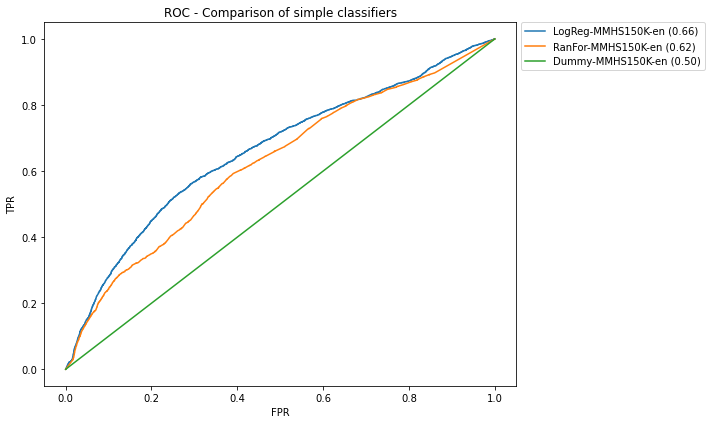

In [24]:
plt.figure(figsize=(10,6))
for model_name, f1, precision, recall, roc_auc, fpr, tpr in sorted(results, key=lambda x: x[4], reverse=True):
    plt.plot(fpr, tpr, label=f"{model_name} ({roc_auc:.2f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC - Comparison of simple classifiers")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, ncol=1)
plt.tight_layout()
plt.savefig("results/eval-handcrafted-rocs.pdf")

In [25]:
results_df = pd.DataFrame(results, columns=["model_name", "f1", "precision", "recall", "roc_auc", "fpr", "tpr"])
results_df.to_csv("results/eval-handcrafted-alignment.csv", index=False)
results_df.head(30)

,model_name,f1,precision,recall,roc_auc,fpr,tpr
0,LogReg-MMHS150K-en,0.455741,0.380883,0.567221,0.660454,"[0.0, 0.0, 0.0002651113467656416, 0.0002651113...","[0.0, 0.0002727024815925825, 0.000272702481592..."
1,RanFor-MMHS150K-en,0.318569,0.438756,0.250068,0.622628,"[0.0, 0.015553199010250972, 0.0155531990102509...","[0.0, 0.026724843196073083, 0.0269975456776656..."
2,Dummy-MMHS150K-en,0.000000,0.000000,0.000000,0.500000,"[0.0, 1.0]","[0.0, 1.0]"


In [26]:
%reset